### Dataset Exploration

In [1]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from rdflimeConfig import datasets, load_dataset

In [2]:
# 0: Metacritic-Movies
# 1: Metacritic-Albums
# 2: Forbes-Companies
# 3: Mercer-Cities
# 4: AAUP-Universities
# -> See rdflimeConfig.py
explored_dataset_idx = 4

dataset_full, dataset_entities = load_dataset(datasets[explored_dataset_idx], fixed=False)
cfg = datasets[explored_dataset_idx]

In [3]:
print(f"""
{cfg["name"]} dataset loaded.
Total samples: {len(dataset_full)}
""")

label_col = cfg["columns"]["label"]
for label in dataset_full[label_col].unique():
    print(label, len(dataset_full[dataset_full.label == label]))

#dataset_full


aaup-universities dataset loaded.
Total samples: 960

medium 527
high 197
low 236


In [4]:
# Best / worst entries?
rating_col = cfg["columns"]["rating"]
display(dataset_full.sort_values(by="rating", ascending=False).head(3))
display(dataset_full.sort_values(by="rating", ascending=False).tail(3))

,Wikidata_URI15,FICE,College_name,State,Type,Average_salary_full_professors,Average_salary_associate_professors,Average_salary_assistant_professors,rating,Average_compensation_full_professor,...,Number_of_assistant_professors,Number_of_instructors,Number_of_faculty_all_ranks,DBpedia_URI,label,label_comp,id,DBpedia_URI15,YAGO_URI15,DBpedia_URI15_Base32
45,http://www.wikidata.org/entity/Q161562,1131,California Institute of Technology,CA,I,970,733,576.0,866,1204,...,44,0,257,http://dbpedia.org/resource/California_Institu...,high,high,46,http://dbpedia.org/resource/California_Institu...,http://yago-knowledge.org/resource/California_...,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6Q...
71,http://www.wikidata.org/entity/Q41506,1305,Stanford University,CA,I,952,658,519.0,824,1144,...,145,0,834,http://dbpedia.org/resource/Stanford_University,high,high,72,http://dbpedia.org/resource/Stanford_University,http://yago-knowledge.org/resource/Stanford_Un...,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6U...
335,http://www.wikidata.org/entity/Q13371,2155,Harvard University,MA,I,1009,559,500.0,793,1236,...,255,8,1172,http://dbpedia.org/resource/Harvard_University,high,high,336,http://dbpedia.org/resource/Harvard_University,http://yago-knowledge.org/resource/Harvard_Uni...,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6S...


,Wikidata_URI15,FICE,College_name,State,Type,Average_salary_full_professors,Average_salary_associate_professors,Average_salary_assistant_professors,rating,Average_compensation_full_professor,...,Number_of_assistant_professors,Number_of_instructors,Number_of_faculty_all_ranks,DBpedia_URI,label,label_comp,id,DBpedia_URI15,YAGO_URI15,DBpedia_URI15_Base32
798,http://www.wikidata.org/entity/Q5210062,3461,Dakota Wesleyan University,SD,IIB,*,290,246.0,257,*,...,13,7,36,http://dbpedia.org/resource/Dakota_Wesleyan_Un...,low,low,799,http://dbpedia.org/resource/Dakota_Wesleyan_Un...,http://yago-knowledge.org/resource/Dakota_Wesl...,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6R...
792,http://www.wikidata.org/entity/Q7941707,3455,Voorhees College,SC,IIB,*,*,254.0,233,*,...,12,14,30,http://dbpedia.org/resource/Voorhees_College,low,low,793,http://dbpedia.org/resource/Voorhees_College,http://yago-knowledge.org/resource/Voorhees_Co...,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6V...
262,http://www.wikidata.org/entity/Q7401849,1835,Saint Mary-of-the-Woods Coll,IN,IIB,307,234,199.0,232,382,...,18,4,44,http://dbpedia.org/resource/Saint_Mary-of-the-...,low,low,263,http://dbpedia.org/resource/Saint_Mary-of-the-...,http://yago-knowledge.org/resource/Saint_Mary-...,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6U...


medium 527
high 197
low 236


<AxesSubplot:>

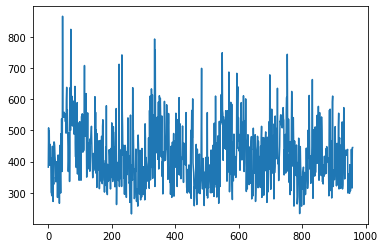

In [5]:
label_col = cfg["columns"]["label"]

# Check number of label occurrences (is the dataset balanced?)
for label in dataset_full[label_col].unique():
    print(label, len(dataset_full[dataset_full.label == label]))

# Are there any visible patterns, e.g. sorting and predefined train/test splits?
dataset_full[rating_col].plot()

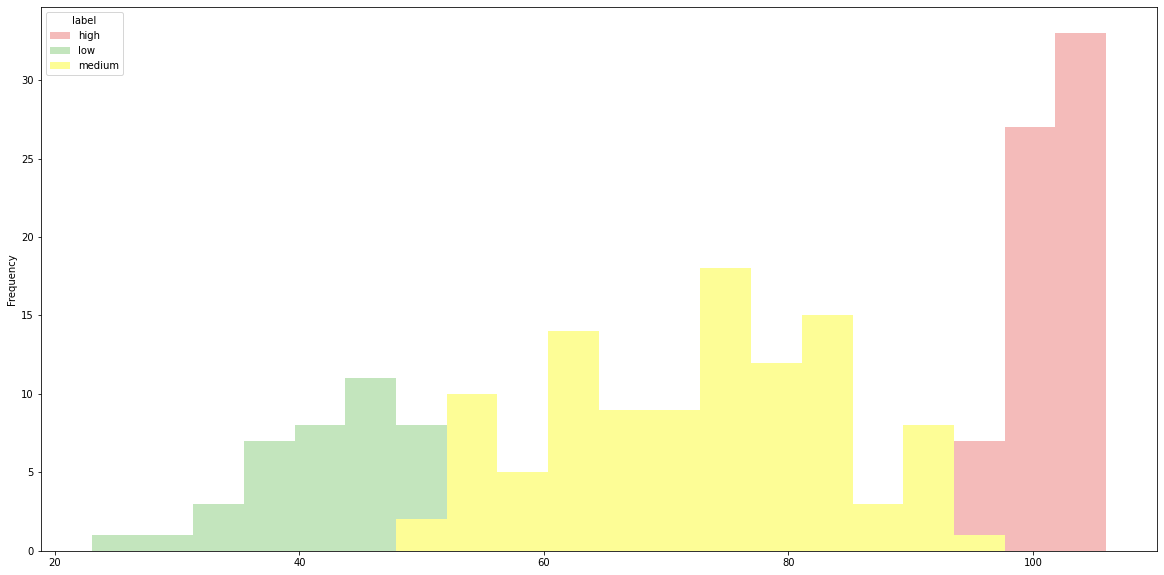

In [116]:
# Check rating distribution using histogram
_ratingHist = dataset_full.copy()
_ratingHist.pivot(columns=label_col, values=rating_col).plot.hist(color=["#F4BBBA", "#C3E5BD", "#fdfd96"], bins=20, figsize=(20,10))

# change figsize


plt.show()

# Findings (metacritic-movies):
# All movies with rating <= 40 marked bad
# All movies with rating >= 60 marked good
# No movies with rating 40-60 contained


In [99]:
# Check movies without rating
dataset_full[pd.isna(dataset_full[rating_col])]

# Findings:
# None contained in updated dataset

,Wikidata_URI15,id,Company,Industry,Country,rating,Sales,Profits,Assets,Rank,DBpedia_URI,label,DBpedia_URI15,YAGO_URI15,DBpedia_URI15_Base32
